In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install optuna

     |████████████████████████████████| 296kB 11.3MB/s 
     |████████████████████████████████| 163kB 44.1MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 143kB 27.3MB/s 
     |████████████████████████████████| 112kB 31.9MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=d007bd7848ffe540bc983ba1ea8a4f8fcd86f932d8301f70dfb8dff9dc8cae8c
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [3]:
pip install catboost --no-cache-dir

     |████████████████████████████████| 67.3MB 1.2MB/s 


In [4]:
pip install shap


     |████████████████████████████████| 358kB 11.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491635 sha256=460851cca4f0779fa25166d2f906de613fc618239770a351ff712463532a408c
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [5]:
pip install -I shap


Processing /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283/shap-0.39.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Using cached https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl
     |████████████████████████████████| 27.4MB 98kB/s 
     |████████████████████████████████| 15.3MB 338kB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 3.4MB 50.0MB/s 
     |████████████████████████████████| 9.9MB 60.5MB/s 
     |████████████████████████████████| 307kB 69.4MB/s 
     |████████████████████████████████| 788kB 50.4MB/s 
     |████████████████████████████████| 25.3MB 121kB/s 
     |████████████████████████████████| 235kB 76.1MB/s 
     |████████████████████████████████| 512kB 54.5MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompa

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
import xgboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import shap
import pandas as pd

from sklearn.model_selection import  train_test_split, cross_val_score, KFold
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder



In [3]:
# Import dataset
train = pd.read_csv("/content/drive/MyDrive/Ignacio Fiori Training/Machine Learning/Titanic/train.csv")

**Exploration and Preprocessing of Data**

In [4]:
train.shape

(891, 12)

In [5]:
train, test=train_test_split(train, test_size=.2)

In [6]:
train.shape

(712, 12)

In [7]:
test.shape

(179, 12)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C


In [9]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 773 to 299
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        158 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,451.051966,0.383427,2.321629,29.150647,0.533708,0.386236,32.038839
std,256.873206,0.486563,0.831303,14.209944,1.098004,0.818892,49.985829
min,3.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,234.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,672.250000,1.000000,3.000000,37.250000,1.000000,0.000000,30.178100
max,890.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


We can see that about 36% of the passengers survived. Also the passengers age range from 0.4 to 80. Besides there are missing values

In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C


From the information above, we can note some things. First of all, that we need to convert a lot of features into numeric ones, so that the machine learning algorithms can process them. Besides, we can see that the features have different ranges, we will need to convert into the same scale. Finally there are also other features with missing valures(NaN).

In [13]:
train_missing = train.isna().sum() / train.shape[0]
train_missing[train_missing > 0.0]

Age         0.196629
Cabin       0.778090
Embarked    0.001404
dtype: float64

In [14]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:3])
print(null)

            0
Cabin     554
Age       140
Embarked    1


In [15]:
test_missing = test.isna().sum() / train.shape[0]
test_missing[test_missing > 0.0]

Age         0.051966
Cabin       0.186798
Embarked    0.001404
dtype: float64

In [16]:
null=pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:3])
print(null)

            0
Cabin     133
Age        37
Embarked    1


From these results we can see that we will deal in a easier way with Embarked feature that with Age and Cabin.

In [17]:
train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005572,-0.029507,0.003072,-0.054273,0.011973,-0.011127
Survived,-0.005572,1.000000,-0.357475,-0.060908,-0.038705,0.069037,0.262534
Pclass,-0.029507,-0.357475,1.000000,-0.379814,0.081329,0.019735,-0.551948
Age,0.003072,-0.060908,-0.379814,1.000000,-0.329589,-0.187725,0.089747
SibSp,-0.054273,-0.038705,0.081329,-0.329589,1.000000,0.407059,0.169315
Parch,0.011973,0.069037,0.019735,-0.187725,0.407059,1.000000,0.244014
Fare,-0.011127,0.262534,-0.551948,0.089747,0.169315,0.244014,1.000000


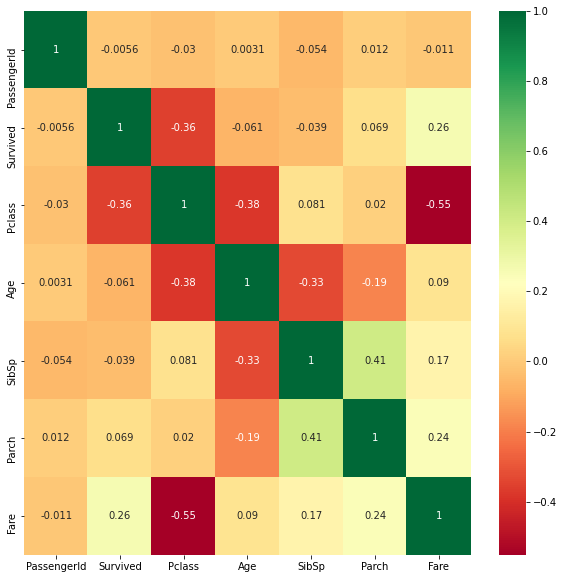

In [19]:
# most correlated features
plt.figure(figsize=(10,10))
g = sns.heatmap(train.corr(),annot=True,cmap="RdYlGn")

- Parch and SibSp seem to be correlated
- Fare and Pclass seem to be negative correlated

In [20]:
print(train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.648810
2       0.476190
3       0.236776


People of upper class tend have more probability of survive

In [21]:
print(train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False))

        Survived
Sex             
female   0.72973
male     0.18543


Womens have more probability of survive than men

In [22]:
print(train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False))

       Survived
SibSp          
1      0.539394
2      0.440000
0      0.345756
3      0.266667
4      0.133333
5      0.000000
8      0.000000


In [23]:
print(train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False))

       Survived
Parch          
3      0.600000
1      0.551020
2      0.516667
0      0.342593
4      0.000000
5      0.000000
6      0.000000


SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [24]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()


1    426
0    286
Name: not_alone, dtype: int64

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C,0,1
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S,0,1
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,0,1
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,2,0
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,0,1


In [26]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,7,0
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,1,0
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S,1,0
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,0,1
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S,0,1


In [27]:
print(train[["relatives", "Survived"]].groupby(['relatives']).mean().sort_values(by='Survived', ascending=False))

           Survived
relatives          
3          0.772727
2          0.587500
1          0.553846
0          0.302817
6          0.222222
4          0.200000
5          0.150000
7          0.000000
10         0.000000


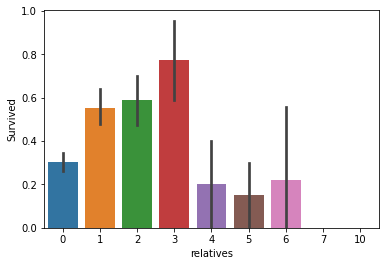

In [28]:
sns.barplot(x='relatives', y='Survived', data=train)


People with few relative have a good probability of survive. Surprisingly people with 6 relatives also has a good probability of survive.

In [29]:
train['relatives'].describe()

count    712.000000
mean       0.919944
std        1.614995
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: relatives, dtype: float64

In [30]:
train['relatives'].value_counts()

0     426
1     130
2      80
3      22
5      20
4      15
6       9
7       5
10      5
Name: relatives, dtype: int64

**Data Preprocessing**

First, I will drop ‘PassengerId’ from the train set.

In [31]:
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [32]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
773,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,C,0,1,8
408,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,S,0,1,8
216,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,S,0,1,8
852,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C,2,0,8
842,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,C,0,1,8


In [34]:
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
59,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S,7,0,8
861,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,S,1,0,8
546,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,S,1,0,8
367,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,C,0,1,8
397,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,S,0,1,8


**AGE**

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [35]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
train["Age"].isnull().sum()

0

**EMBARKED**

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one

In [36]:
common_value = 'S'
train['Embarked'] = train['Embarked'].fillna(common_value)
test['Embarked'] = test['Embarked'].fillna(common_value)

In [37]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:3])
print(null)

          0
Survived  0
Pclass    0
Name      0


In [38]:
null=pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:3])
print(null)

          0
Survived  0
Pclass    0
Name      0


**Converting Features**

In [39]:
train.dtypes

Survived       int64
Pclass         int64
Name          object
Sex           object
Age            int64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
relatives      int64
not_alone      int64
Deck           int64
dtype: object

**Fare**

Converting “Fare” from float to int64, using the “astype()” function that pandas provides:


In [40]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Name**

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that

In [41]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

**Sex**

Convert ‘Sex’ feature into numeric.


In [42]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Ticket**

In [43]:
train['Ticket'].describe()


count        712
unique       572
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [44]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

**Embarked**

Convert ‘Embarked’ feature into numeric.


In [45]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Creating Categories**

**Age**

Now we need to convert the age feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group.

In [46]:
age_slice, bins = pd.qcut(train['Age'], 10, retbins=True)
train['Age'] = age_slice

In [47]:
test['Age'] = pd.cut(test["Age"], bins=bins)

In [48]:
data = [train, test]
for dataset in data:
  dataset['Age'] = LabelEncoder().fit_transform(dataset['Age'])

In [49]:
train['Age'].value_counts()

1    89
0    75
6    74
3    72
8    70
9    70
7    69
2    66
4    66
5    61
Name: Age, dtype: int64

In [50]:
test['Age'].value_counts()

9     30
1     22
5     22
7     19
2     18
3     17
6     15
4     12
0     11
8     10
10     3
Name: Age, dtype: int64

In [51]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
773,0,3,0,4,0,0,7,1,0,1,8,1
408,0,3,0,2,0,0,7,0,0,1,8,1
216,1,3,1,4,0,0,7,0,0,1,8,2
852,0,3,1,0,1,1,15,1,2,0,8,2
842,1,1,1,5,0,0,31,1,0,1,8,2


In [52]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
59,0,3,0,0,5,2,46,0,7,0,8,4
861,0,2,0,2,1,0,11,0,1,0,8,1
546,1,2,1,1,1,0,26,0,1,0,8,3
367,1,3,1,5,0,0,7,1,0,1,8,3
397,0,2,0,9,0,0,26,0,0,1,8,1


**Fare**

For the Fare feature, we need to do the same as with the ‘Age’ feature.

In [53]:
fare_slice, bins = pd.qcut(train['Fare'], 6, retbins=True)
train['Fare'] = fare_slice

In [54]:
test['Fare'] = pd.cut(test["Fare"], bins=bins)

In [55]:
train['Fare'].value_counts()

(-0.001, 7.0]    199
(14.0, 26.0]     136
(49.5, 512.0]    119
(8.0, 14.0]      117
(26.0, 49.5]      91
(7.0, 8.0]        50
Name: Fare, dtype: int64

In [56]:
test['Fare'].value_counts()

(49.5, 512.0]    42
(0.0, 7.0]       41
(8.0, 14.0]      29
(14.0, 26.0]     29
(7.0, 8.0]       20
(26.0, 49.5]     17
Name: Fare, dtype: int64

In [57]:
data = [train, test]
for dataset in data:
  dataset['Fare'] = LabelEncoder().fit_transform(dataset['Fare'])

In [59]:
train['Fare'].value_counts()

0    199
3    136
5    119
2    117
4     91
1     50
Name: Fare, dtype: int64

In [60]:
test['Fare'].value_counts()

5    42
0    41
2    29
3    29
1    20
4    17
6     1
Name: Fare, dtype: int64

In [61]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
773,0,3,0,4,0,0,0,1,0,1,8,1
408,0,3,0,2,0,0,0,0,0,1,8,1
216,1,3,1,4,0,0,0,0,0,1,8,2
852,0,3,1,0,1,1,3,1,2,0,8,2
842,1,1,1,5,0,0,4,1,0,1,8,2


In [62]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
59,0,3,0,0,5,2,4,0,7,0,8,4
861,0,2,0,2,1,0,2,0,1,0,8,1
546,1,2,1,1,1,0,3,0,1,0,8,3
367,1,3,1,5,0,0,0,1,0,1,8,3
397,0,2,0,9,0,0,3,0,0,1,8,1


In [63]:
train.dtypes

Survived     int64
Pclass       int64
Sex          int64
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked     int64
relatives    int64
not_alone    int64
Deck         int64
Title        int64
dtype: object

**Model**

In [64]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1)
y_test = test["Survived"]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 11)
(179, 11)
(712,)
(179,)



**Random Forest:**

In [66]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       110
           1       0.87      0.65      0.74        69

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.83      0.83      0.82       179



**Logistic Regression:**


In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



**Perceptron:**

In [68]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



**CatBoost**

In [69]:
cat = CatBoostClassifier()


cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

print(classification_report(y_test,y_pred))

Learning rate set to 0.008911
0:	learn: 0.6868258	total: 72ms	remaining: 1m 11s
1:	learn: 0.6821578	total: 73ms	remaining: 36.4s
2:	learn: 0.6767575	total: 73.8ms	remaining: 24.5s
3:	learn: 0.6714024	total: 74.6ms	remaining: 18.6s
4:	learn: 0.6658851	total: 75.3ms	remaining: 15s
5:	learn: 0.6628655	total: 76.1ms	remaining: 12.6s
6:	learn: 0.6578456	total: 76.9ms	remaining: 10.9s
7:	learn: 0.6521114	total: 77.7ms	remaining: 9.63s
8:	learn: 0.6472906	total: 78.4ms	remaining: 8.64s
9:	learn: 0.6427988	total: 79.2ms	remaining: 7.84s
10:	learn: 0.6400905	total: 79.7ms	remaining: 7.17s
11:	learn: 0.6348181	total: 80.5ms	remaining: 6.63s
12:	learn: 0.6301348	total: 81.3ms	remaining: 6.17s
13:	learn: 0.6254098	total: 82ms	remaining: 5.78s
14:	learn: 0.6217482	total: 82.7ms	remaining: 5.43s
15:	learn: 0.6175447	total: 83.4ms	remaining: 5.13s
16:	learn: 0.6133339	total: 84.2ms	remaining: 4.87s
17:	learn: 0.6093581	total: 84.9ms	remaining: 4.63s
18:	learn: 0.6052545	total: 85.6ms	remaining: 4.42s

**XGBoost**

In [70]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



**Light GBM**

In [71]:
lgb = lgb.LGBMClassifier()

lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.85      0.64      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179



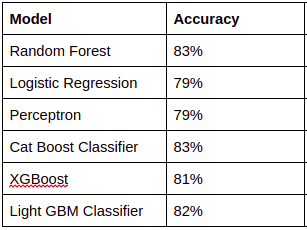

Let's make use of optuna to find optimal values for random forest and xgb boost for example.

In [89]:

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True)

# Define the helper function so that it can be reused
def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

In [85]:
##################
# XGBoost
##################
def xgboost_objective(trial):
    _colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 0.9, log = True)
    _gamma = trial.suggest_int("gamma", 0, 10)
    _learning_rate = trial.suggest_float("learning_rate", 0.1, 0.6, log = True)
    _max_depth = trial.suggest_int("max_depth", 3, 9)
    _min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    _reg_alpha = trial.suggest_float("reg_alpha", 0.3, 0.9, log = True)
    _reg_lambda = trial.suggest_float("reg_lambda", 0.3, 0.9, log = True)
    _subsample = trial.suggest_float("subsample", 0.1, 0.9, log = True)
    xgb = xgboost.XGBClassifier(
        colsample_bytree=_colsample_bytree,
        gamma = _gamma,
        learning_rate = _learning_rate,
        max_depth = _max_depth,
        min_child_weight = _min_child_weight,
        reg_alpha = _reg_alpha,
        reg_lambda = _reg_lambda,
        subsample = _subsample,
        n_jobs=-1,
    )

    scores = cross_val_score(
        xgb, X_train, y_train, cv=kfolds, scoring="accuracy"
    )
    return scores.mean()

xgboost_params = tune(xgboost_objective)
xgb = xgboost.XGBClassifier(n_jobs=-1, **xgboost_params)

[I 2021-04-30 18:41:23,900] A new study created in memory with name: no-name-05702286-21fe-428d-a56c-49c528fd79a9
[I 2021-04-30 18:41:24,158] Trial 0 finished with value: 0.7654147104851331 and parameters: {'colsample_bytree': 0.16917492637068107, 'gamma': 1, 'learning_rate': 0.42073197654215316, 'max_depth': 6, 'min_child_weight': 9, 'reg_alpha': 0.8730049020826172, 'reg_lambda': 0.8016548110884814, 'subsample': 0.12107165008749571}. Best is trial 0 with value: 0.7654147104851331.
[I 2021-04-30 18:41:24,500] Trial 1 finished with value: 0.8216353677621283 and parameters: {'colsample_bytree': 0.35095268697016424, 'gamma': 4, 'learning_rate': 0.3788261349333747, 'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0.3350761365962388, 'reg_lambda': 0.7292309085876839, 'subsample': 0.612661524669284}. Best is trial 1 with value: 0.8216353677621283.
[I 2021-04-30 18:41:24,872] Trial 2 finished with value: 0.8061815336463225 and parameters: {'colsample_bytree': 0.3708714480613421, 'gamma': 4

Best score: 0.8427230046948357

Optimized parameters: {'colsample_bytree': 0.31780542982994026, 'gamma': 4, 'learning_rate': 0.3870297757991567, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.6111695628501788, 'reg_lambda': 0.5761321285675478, 'subsample': 0.7269388445061777}



In [86]:
xgb = XGBClassifier(colsample_bytree = 0.31780542982994026, 
                    gamma = 4, 
                    learning_rate = 0.3870297757991567, 
                    max_depth = 5, 
                    min_child_weight = 1, 
                    reg_alpha = 0.6111695628501788, 
                    reg_lambda = 0.5761321285675478, 
                    subsample = 0.7269388445061777)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       110
           1       0.85      0.65      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [91]:
##################
# Random Forest
##################
def randomforest_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 300, 2000)
    _max_depth = trial.suggest_int("max_depth", 5, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 2, 10)

    rf = RandomForestClassifier(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=-1
        )

    scores = cross_val_score(
        rf, X_train, y_train, cv=kfolds, scoring="accuracy"
    )
    return scores.mean()


randomforest_params = tune(randomforest_objective)
rf = RandomForestClassifier(n_jobs=-1, **randomforest_params)

[I 2021-04-30 19:21:53,150] A new study created in memory with name: no-name-41a6e192-0b9e-42f8-8568-4af1fe576472
[I 2021-04-30 19:22:18,941] Trial 0 finished with value: 0.825802034428795 and parameters: {'n_estimators': 1242, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 9}. Best is trial 0 with value: 0.825802034428795.
[I 2021-04-30 19:22:27,925] Trial 1 finished with value: 0.8229851330203444 and parameters: {'n_estimators': 399, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 9}. Best is trial 0 with value: 0.825802034428795.
[I 2021-04-30 19:22:40,772] Trial 2 finished with value: 0.829988262910798 and parameters: {'n_estimators': 644, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 6}. Best is trial 2 with value: 0.829988262910798.
[I 2021-04-30 19:23:09,787] Trial 3 finished with value: 0.8285993740219093 and parameters: {'n_estimators': 1438, 'max_depth': 18, 'min_samples_split':

Best score: 0.8384976525821596

Optimized parameters: {'n_estimators': 1972, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 4}



In [95]:
rfc = RandomForestClassifier(n_estimators = 1972, max_depth = 8, min_samples_leaf = 9, min_samples_split = 7, max_features=4)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.87      0.68      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



Let's evaluate our models with Shap Values

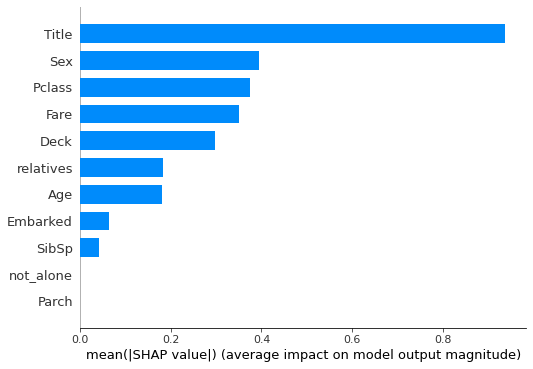

In [96]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_xgb, X_test, plot_type = 'bar')

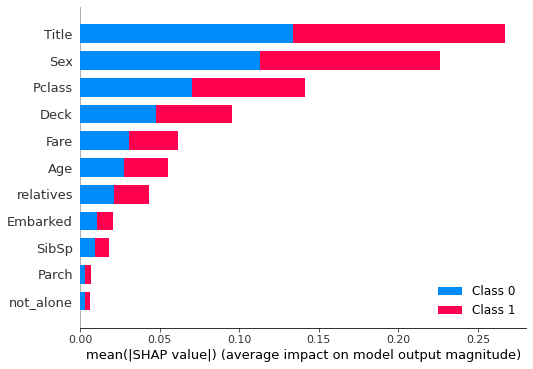

In [97]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_rfc, X_test, plot_type = 'bar')

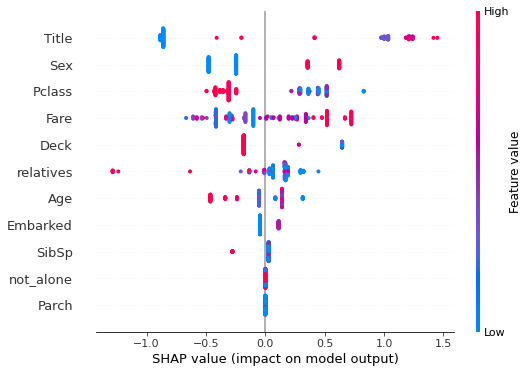

In [98]:
shap.summary_plot(shap_values_xgb, X_test)

Title is the most important feature and low values like Mrs tend to die. Sex is also a very important feature and as we see above women have more probability of survive. People who have low class of ticket tend to die also. About age, children seem to survive.


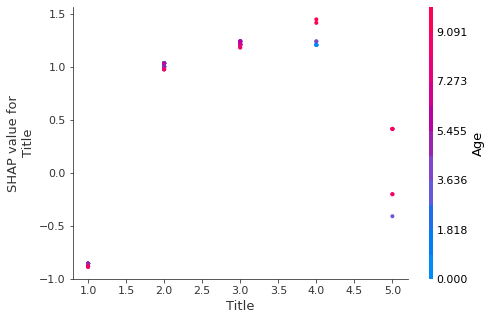

In [103]:
shap.dependence_plot("Title", shap_values_xgb, X_test)


Mrs and Rare categories tend to die.

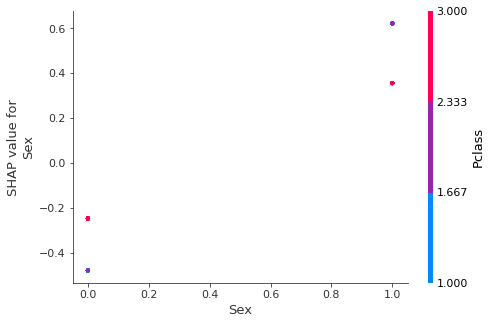

In [102]:
shap.dependence_plot("Sex", shap_values_xgb, X_test)


Female tend to survive whereas Men tend to die

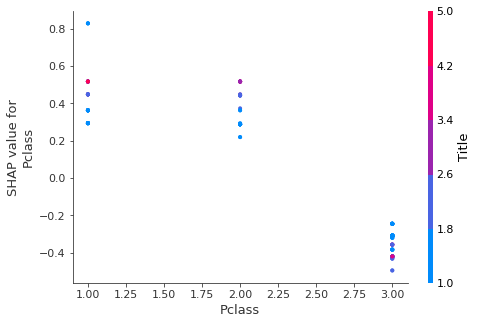

In [104]:
shap.dependence_plot("Pclass", shap_values_xgb, X_test)


People who have the lowest class tend to die

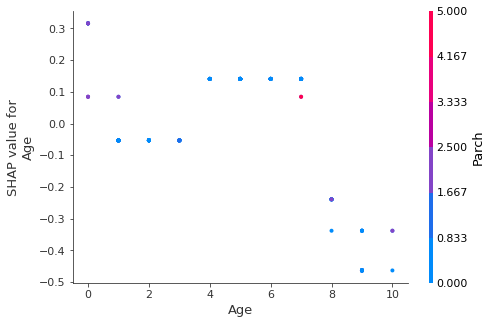

In [105]:
shap.dependence_plot("Age", shap_values_xgb, X_test)


Children tend to survive. Older people tend to die

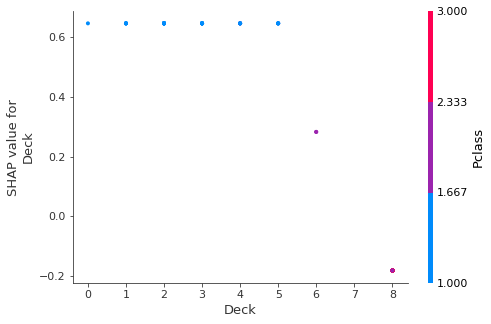

In [106]:
shap.dependence_plot("Deck", shap_values_xgb, X_test)


People from the U cabin tend to die. There are other decks with highest probability of survive

In [107]:
real_value=pd.DataFrame({'survive':y_test})
predict_value=pd.DataFrame({'survive':y_pred})
with pd.ExcelWriter('c:\\test.xls') as writer:
    real_value.to_excel(writer, sheet_name='Sheet1')
    predict_value.to_excel(writer, sheet_name='Sheet2')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


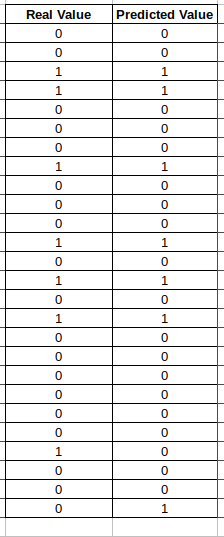

As error analysis we should explore cases where our model failed in the prediction

In [108]:
X_test.loc[630, [ 
'Sex',
'Title',
'Pclass',
'Fare',
'Age',
'relatives',
'Deck',
'SibSp',
'Embarked',
'Parch',
'not_alone' ]]

Sex           0
Title         1
Pclass        1
Fare          4
Age          10
relatives     0
Deck          1
SibSp         0
Embarked      0
Parch         0
not_alone     1
Name: 630, dtype: int64

In [109]:
print("The real value is: " + str(y_test.loc[630]))
print("The predicted value is: " + str(y_pred[22]))

The real value is: 1
The predicted value is: 0


I think that in this case as the person was a man, the value of title was the lowest one and it was an old man this led our model to predict 0. It may be an outlier, we should take a look on it 

In [112]:
X_test.loc[140, [ 
'Sex',
'Title',
'Pclass',
'Fare',
'Age',
'relatives',
'Deck',
'SibSp',
'Embarked',
'Parch',
'not_alone' ]]

Sex          1
Title        3
Pclass       3
Fare         3
Age          8
relatives    2
Deck         8
SibSp        0
Embarked     1
Parch        2
not_alone    0
Name: 140, dtype: int64

In [113]:
print("The real value is: " + str(y_test.loc[140]))
print("The predicted value is: " + str(y_pred[25]))

The real value is: 0
The predicted value is: 1


In this case maybe the value of Title and Sex led our model to predict 1. 

We should try another ways of encoding our features and combine, delete or add features and check how our models predict with these changes.